In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### 随机森林package

In [4]:
from sklearn  import tree
#随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#填充缺失值
from sklearn.preprocessing import Imputer

#标签二元化
from sklearn.preprocessing import label_binarize
#绘制ROC
from sklearn import metrics

In [5]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

### 读取数据

In [6]:
path = 'datas/risk_factors_cervical_cancer.csv'
data = pd.read_csv(path)
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [7]:
names = [u'Age', u'Number of sexual partners', u'First sexual intercourse',
       u'Num of pregnancies', u'Smokes', u'Smokes (years)',
       u'Smokes (packs/year)', u'Hormonal Contraceptives',
       u'Hormonal Contraceptives (years)', u'IUD', u'IUD (years)', u'STDs',
       u'STDs (number)', u'STDs:condylomatosis',
       u'STDs:cervical condylomatosis', u'STDs:vaginal condylomatosis',
       u'STDs:vulvo-perineal condylomatosis', u'STDs:syphilis',
       u'STDs:pelvic inflammatory disease', u'STDs:genital herpes',
       u'STDs:molluscum contagiosum', u'STDs:AIDS', u'STDs:HIV',
       u'STDs:Hepatitis B', u'STDs:HPV', u'STDs: Number of diagnosis',
       u'STDs: Time since first diagnosis', u'STDs: Time since last diagnosis',
       u'Dx:Cancer', u'Dx:CIN', u'Dx:HPV', u'Dx', u'Hinselmann', u'Schiller',
       u'Citology', u'Biopsy']

### 构造X,Y

In [8]:
X = data[names[0:-4]]
Y = data[names[-4:]]

In [9]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,?,?,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,?,?,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,?,?,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0,?,?,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0,?,?,0,0,0,0


In [10]:
Y.head()

,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### 乱码处理

In [11]:
#空值处理
X = X.replace('?',np.NAN)
#使用Imputer给定缺失值，默认mean
imputer = Imputer(missing_values = 'NaN')
X = imputer.fit_transform(X,Y)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
X[0]

array([18.        ,  4.        , 15.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  6.14084507,  5.81690141,  0.        ,  0.        ,
        0.        ,  0.        ])

### 数据分割

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
x_train.shape

(686, 32)

In [15]:
y_train.shape

(686, 4)

### 标准化处理

In [16]:
ss = MinMaxScaler()  # 分类模型
x_train = ss.fit_transform(x_train,y_train)
x_test = ss.transform(x_test)
x_train.shape

(686, 32)

### PCA降维

In [17]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [18]:
pca.explained_variance_ratio_

array([0.24021831, 0.2067443 ])

### 随机森林建模

In [19]:
forest = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=2,random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### 效果评估

In [20]:
score = forest.score(x_test,y_test)
score

0.8953488372093024

In [21]:
#获取预测概率值
forest_y_score = forest.predict_proba(x_test)
np.array(forest_y_score).shape

(4, 172, 2)

In [22]:
forest_y_score

[array([[0.96214728, 0.03785272],
        [0.94698282, 0.05301718],
        [0.94923874, 0.05076126],
        [0.85844906, 0.14155094],
        [0.96395529, 0.03604471],
        [0.96061881, 0.03938119],
        [0.96395529, 0.03604471],
        [0.95790003, 0.04209997],
        [0.96145436, 0.03854564],
        [0.95918154, 0.04081846],
        [0.96131173, 0.03868827],
        [0.94330305, 0.05669695],
        [0.96395529, 0.03604471],
        [0.96306562, 0.03693438],
        [0.96214728, 0.03785272],
        [0.94681983, 0.05318017],
        [0.96061881, 0.03938119],
        [0.96306562, 0.03693438],
        [0.96214728, 0.03785272],
        [0.96061881, 0.03938119],
        [0.96214728, 0.03785272],
        [0.96061881, 0.03938119],
        [0.95635206, 0.04364794],
        [0.96061881, 0.03938119],
        [0.91673441, 0.08326559],
        [0.8488329 , 0.1511671 ],
        [0.94185554, 0.05814446],
        [0.96395529, 0.03604471],
        [0.96408952, 0.03591048],
        [0.946

### 准备ROC数据

In [23]:
forest_fpr1, forest_tpr1, _ = metrics.roc_curve(label_binarize(y_test[names[-4]],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[0].ravel())
forest_fpr2, forest_tpr2, _ = metrics.roc_curve(label_binarize(y_test[names[-3]],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[1].ravel())
forest_fpr3, forest_tpr3, _ = metrics.roc_curve(label_binarize(y_test[names[-2]],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[2].ravel())
forest_fpr4, forest_tpr4, _ = metrics.roc_curve(label_binarize(y_test[names[-1]],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[3].ravel())

### AUC面积

In [24]:
auc1 = metrics.auc(forest_fpr1,forest_tpr1)
auc2 = metrics.auc(forest_fpr2,forest_tpr2)
auc3 = metrics.auc(forest_fpr3,forest_tpr3)
auc4 = metrics.auc(forest_fpr4,forest_tpr4)

In [25]:
auc1,auc2,auc3,auc4

(0.9905692266089777,
 0.9653190914007571,
 0.9620740941049216,
 0.9610262303948081)

In [26]:
y_true = label_binarize(y_test[names[-4]],classes=(0,1,2)).T[0:-1].T.ravel()
y_predict = forest_y_score[0].ravel()
metrics.roc_curve(y_true,y_predict)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00581395,
        0.00581395, 0.00581395, 0.00581395, 0.00581395, 0.00581395,
        0.00581395, 0.00581395, 0.00581395, 0.00581395, 0.00581395,
        0.00581395, 0.00581395, 0.00581395, 0.01162791, 0.01162791,
        0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
        0.01162791, 0.02325581, 0.04069767, 0.12790698, 0.14534884,
        0.16860465, 0.18023256, 0.18604651, 0.20930233, 0.24418605,
        0.26744186, 0.29069767, 0.29651163, 0.33139535, 0.36046512,
        0.37209302, 0.4127907 , 0.41860465, 0.51744186, 0.52906977,
        0.55232558, 0.56395349, 0.68604651, 0.72093023, 0.81395349,
        0.8255814 , 0.95348837, 0.96511628, 0.97093023, 0.98255814,
        1.        ]),
 array([0.        , 0.01744186, 0.02906977, 0.03488372, 0.04651163,
        0.1744186 , 0.18604651, 0.27906977, 0.31395349, 0.43604651,
        0.44767442, 0.4709

### 可视化

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


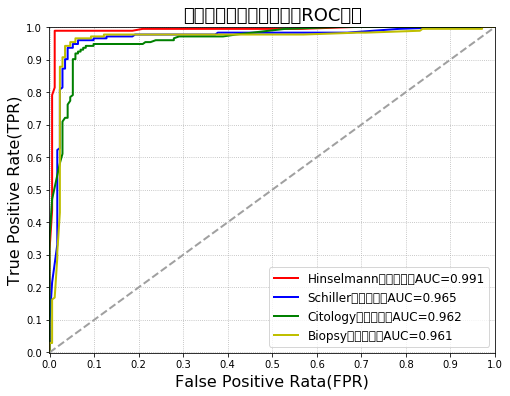

In [27]:
plt.figure(figsize=(8,6),facecolor='w')
plt.plot(forest_fpr1,forest_tpr1,c='r',lw=2,label=u'Hinselmann目标属性，AUC=%.3f'% auc1)
plt.plot(forest_fpr2,forest_tpr2,c='b',lw=2,label=u'Schiller目标属性，AUC=%.3f'% auc2)
plt.plot(forest_fpr3,forest_tpr3,c='g',lw=2,label=u'Citology目标属性，AUC=%.3f'% auc3)
plt.plot(forest_fpr4,forest_tpr4,c='y',lw=2,label=u'Biopsy目标属性，AUC=%.3f'% auc4)

#随机猜测结果
plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.001,1.001)
plt.ylim(-0.001,1.001)
#刻度
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
#标签
plt.xlabel('False Positive Rata(FPR)',fontsize=16)
plt.ylabel('True Positive Rate(TPR)',fontsize=16)
plt.grid(b=True,ls=':')
plt.legend(loc='lower right',fancybox=True,framealpha=0.8,fontsize=12)
plt.title(u'随机森林多目标属性分类ROC曲线',fontsize=18)
plt.show()

### 调参

In [28]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X,Y,test_size=0.5,random_state=0)


In [29]:
x_train2.shape

(429, 32)

In [30]:
x_test2.shape

(429, 32)

In [35]:
#树的数目
estimators = [1,50,100,500]
#树的深度
depth = [1,2,3,7,15]
#错误率
err_list = []

for es in estimators:
    es_list = []
    for d in depth:
        tf = RandomForestClassifier(n_estimators=es,criterion='gini',max_depth=d,random_state=0)
        tf.fit(x_train2,y_train2)
        #计算性能指标
        st = tf.score(x_test2,y_test2)
        err = 1-st
        es_list.append(err)
        print('%d决策树数目，%d最大深度，正确率：%.2f%%' % (es,d,st*100))
#         print('%d决策树数目，%d最大深度，正确率：%.2f%%' % (es,d,st*100))
        
    err_list.append(es_list)

1决策树数目，1最大深度，正确率：88.11%
1决策树数目，2最大深度，正确率：88.11%
1决策树数目，3最大深度，正确率：87.88%
1决策树数目，7最大深度，正确率：85.78%
1决策树数目，15最大深度，正确率：74.36%
50决策树数目，1最大深度，正确率：88.11%
50决策树数目，2最大深度，正确率：88.11%
50决策树数目，3最大深度，正确率：86.95%
50决策树数目，7最大深度，正确率：86.95%
50决策树数目，15最大深度，正确率：86.48%
100决策树数目，1最大深度，正确率：88.11%
100决策树数目，2最大深度，正确率：88.11%
100决策树数目，3最大深度，正确率：86.95%
100决策树数目，7最大深度，正确率：86.71%
100决策树数目，15最大深度，正确率：86.48%
500决策树数目，1最大深度，正确率：88.11%
500决策树数目，2最大深度，正确率：88.11%
500决策树数目，3最大深度，正确率：86.95%
500决策树数目，7最大深度，正确率：86.95%
500决策树数目，15最大深度，正确率：86.71%


### 可视化

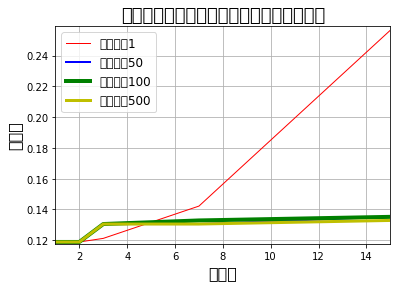

In [42]:
plt.figure(facecolor='w')
i = 0
colors = ['r','b','g','y']
lw = [1,2,4,3]
max_err = 0
min_err = 100
#获取所有最大最小值
for es,l in zip(estimators,err_list):
    plt.plot(depth, l,c = colors[i],lw=lw[i],label = u'树数目：%d'% es)
    max_err = max((max(l),max_err))
    min_err = min((min(l),min_err))
    i+=1
    
#标签
plt.xlabel(u'树深度',fontsize=16)
plt.ylabel(u'错误率',fontsize=16)
plt.grid(b=True)
plt.legend(loc='upper left',fancybox=True, framealpha = 0.8,fontsize=12)
plt.xlim(min(depth),max(depth))
plt.ylim(min_err * 0.99,max_err * 1.01)
plt.title(u'随机森林中树数目、深度和错误率的关系图',fontsize = 18)
plt.show()